# <u>**Smartphone Brand Analysis**</u>

## **Importing Libraries**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## **Reading the dataset**

In [41]:
df = pd.read_csv("../dataset/Amazon_top5_mobilephones.csv")

## **Creating Save path for images**

In [42]:
save_path = os.path.join(os.path.dirname(os.getcwd()), "images")
save_path

'/home/p1utoze/ML-Crate/Smartphone Brands Analysis/images'

## **Understanding the data**

In [43]:
df.head()

,Description,Price,Rating,ReviewCount,Url
0,Apple iPhone 13 (128GB) - Pink,65999,4.6 out of 5 stars,"7,507",https://www.amazon.in//sspa/click?ie=UTF8&spc=...
1,Apple iPhone 13 Mini (128GB) - Pink,64900,4.5 out of 5 stars,"1,341",https://www.amazon.in//sspa/click?ie=UTF8&spc=...
2,Apple iPhone 12 (128GB) - Green,55999,4.5 out of 5 stars,"4,941",https://www.amazon.in//New-Apple-iPhone-12-128...
3,Apple iPhone 12 (64GB) - Green,48900,4.6 out of 5 stars,"1,299",https://www.amazon.in//New-Apple-iPhone-12-64G...
4,Apple iPhone 13 (128GB) - Green,65999,4.6 out of 5 stars,"7,507",https://www.amazon.in//Apple-iPhone-13-128GB-G...


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1903.0,27794.156069,22934.962665,760.0,12660.0,18499.0,32999.0,111900.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  1903 non-null   object
 1   Price        1903 non-null   int64 
 2   Rating       1881 non-null   object
 3   ReviewCount  1903 non-null   object
 4   Url          1903 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.5+ KB


In [46]:
df.shape

(1903, 5)

## **Data Pre-processing and cleaning**

> #### **Changing the column names to lower case**

In [47]:
cols = df.columns.to_list()
df.columns = [i.lower() for i in cols]

> #### **Filling null values = 0**

In [48]:
df.rating = df.rating.fillna(0)
df.isnull().sum()

description    0
price          0
rating         0
reviewcount    0
url            0
dtype: int64

In [49]:
data = df.copy()

In [50]:
data.head()

,description,price,rating,reviewcount,url
0,Apple iPhone 13 (128GB) - Pink,65999,4.6 out of 5 stars,"7,507",https://www.amazon.in//sspa/click?ie=UTF8&spc=...
1,Apple iPhone 13 Mini (128GB) - Pink,64900,4.5 out of 5 stars,"1,341",https://www.amazon.in//sspa/click?ie=UTF8&spc=...
2,Apple iPhone 12 (128GB) - Green,55999,4.5 out of 5 stars,"4,941",https://www.amazon.in//New-Apple-iPhone-12-128...
3,Apple iPhone 12 (64GB) - Green,48900,4.6 out of 5 stars,"1,299",https://www.amazon.in//New-Apple-iPhone-12-64G...
4,Apple iPhone 13 (128GB) - Green,65999,4.6 out of 5 stars,"7,507",https://www.amazon.in//Apple-iPhone-13-128GB-G...


In [51]:
data = data.drop(["url"], axis=1)

## **Categorical Data -> Numerical Data**

In [52]:
data["rating"] = data["rating"].str[:3]
data.rating = data.rating.astype('float')

In [53]:
data["description"].unique()

array(['Apple iPhone 13 (128GB) - Pink',
       'Apple iPhone 13 Mini (128GB) - Pink',
       'Apple iPhone 12 (128GB) - Green',
       'Apple iPhone 12 (64GB) - Green',
       'Apple iPhone 13 (128GB) - Green', 'Apple iPhone 14 128GB Blue',
       'Apple iPhone 12 (128GB) - Purple',
       'Apple iPhone 12 (64GB) - (Product) RED',
       'Apple iPhone 11 (64GB) - White', 'Apple iPhone 11 (64GB) - Black',
       'Apple iPhone 12 (64GB) - Purple',
       'Apple iPhone 14 Plus 128GB Blue',
       'Apple iPhone 13 Pro (128GB) - Graphite',
       'Apple iPhone 14 Plus 256GB Blue',
       'Apple iPhone 14 Plus 128GB Midnight',
       'Apple iPhone 12 (128GB) - Black',
       'Apple iPhone 14 128GB Midnight',
       'Apple iPhone 13 (128GB) - (Product) RED',
       'Samsung Galaxy M13 (Stardust Brown, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM with RAM Plus',
       'Samsung Galaxy S22 5G (Phantom Black, 8GB, 128GB Storage) with No Cost EMI/Additional Exchange Offers',
       'Sam

In [54]:
data.reviewcount = data.reviewcount.str.replace(',', '0')
data.reviewcount = data.reviewcount.str.replace('New to Amazon', '0')
data.reviewcount = data.reviewcount.str.replace('No reviews', '0')
data.reviewcount = data.reviewcount.astype('int')
data.reviewcount.unique()

array([   70507,    10341,    40941,    10299,      130,   550461,
             72,    10492,    30354,    40520,   120588,      772,
         180423,       82,    70251,   530216,      124,   250090,
            455,        5,   590745,        0,   230725,   850659,
          50218,        3,       40,    10274,       86,    20247,
            287, 30040898,   310010,   570583,    90323,       30,
             27,      106,    90426,   220491,    10929,        6,
            340,       39,       28,       92,       14,        7,
            241,      458,      292,    40302,      923,        1])

In [55]:
data['brand'] = data['description'].apply(lambda x : 'Samsung' if 'SAMSUNG' in x or 'Samsung' in x else x)
data['brand'] = data['brand'].apply(lambda x : 'Vivo' if 'vivo' in x or 'Vivo' in x else x)
data['brand'] = data['brand'].apply(lambda x : 'Oppo' if 'OPPO' in x or 'Oppo' in x else x)
data['brand'] = data['brand'].apply(lambda x : 'Xiaomi ' if 'Xiaomi ' in x or 'Mi ' in x or 'MI ' in x else x)
data['brand'] = data['brand'].apply(lambda x : 'Apple' if 'Apple' in x else x)
data['brand'] = data['brand'].apply(lambda x : 'Lava' if 'Lava' in x else x)
data['brand'] = data['brand'].apply(lambda x : 'Redmi' if 'Redmi' in x else x)
data['brand'] = data['brand'].apply(lambda x : 'IKALL' if 'IKALL' in x else x)
data['brand'] = data['brand'].apply(lambda x : 'BTC' if 'BTC' in x else x)

In [56]:
renewed_brand = data[data.brand.str.contains('(?:Renewed)')].copy()
renewed_brand.brand = renewed_brand.brand.str.split(' ').str[1]

data.update(renewed_brand)
data = data[['brand', 'description', 'price', 'rating', 'reviewcount']]
data.brand.unique()

array(['Apple', 'Samsung', 'Lava', 'Redmi', 'Xiaomi ', 'Oppo', 'BTC',
       'Vivo', 'IKALL'], dtype=object)

In [57]:
data.head()

,brand,description,price,rating,reviewcount
0,Apple,Apple iPhone 13 (128GB) - Pink,65999,4.6,70507
1,Apple,Apple iPhone 13 Mini (128GB) - Pink,64900,4.5,10341
2,Apple,Apple iPhone 12 (128GB) - Green,55999,4.5,40941
3,Apple,Apple iPhone 12 (64GB) - Green,48900,4.6,10299
4,Apple,Apple iPhone 13 (128GB) - Green,65999,4.6,70507


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        1903 non-null   object 
 1   description  1903 non-null   object 
 2   price        1903 non-null   int64  
 3   rating       1881 non-null   float64
 4   reviewcount  1903 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 74.5+ KB


In [59]:
data['rating'] = data['rating'].fillna(value=0)
data.isnull().sum()

brand          0
description    0
price          0
rating         0
reviewcount    0
dtype: int64

## **Exploratory Data Analysis**

> #### **Correlation Heatmap**

[]

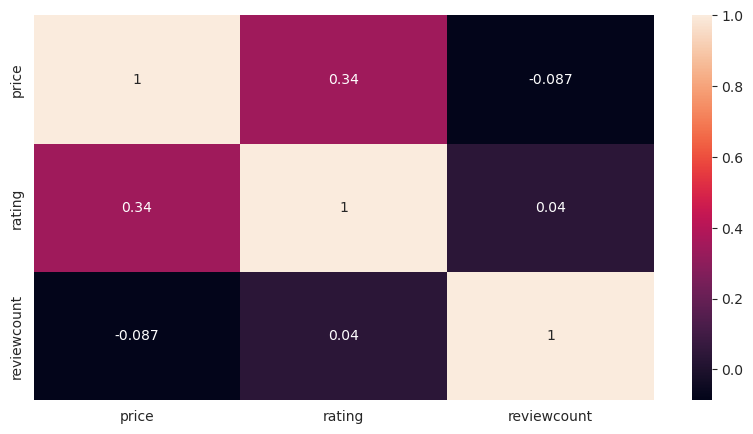

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(data[["price", "rating", "reviewcount"]].corr(), annot=True)
plt.plot()

## **Number count of each brand**
##### We can see that Samsung has more number of models and BTC the least

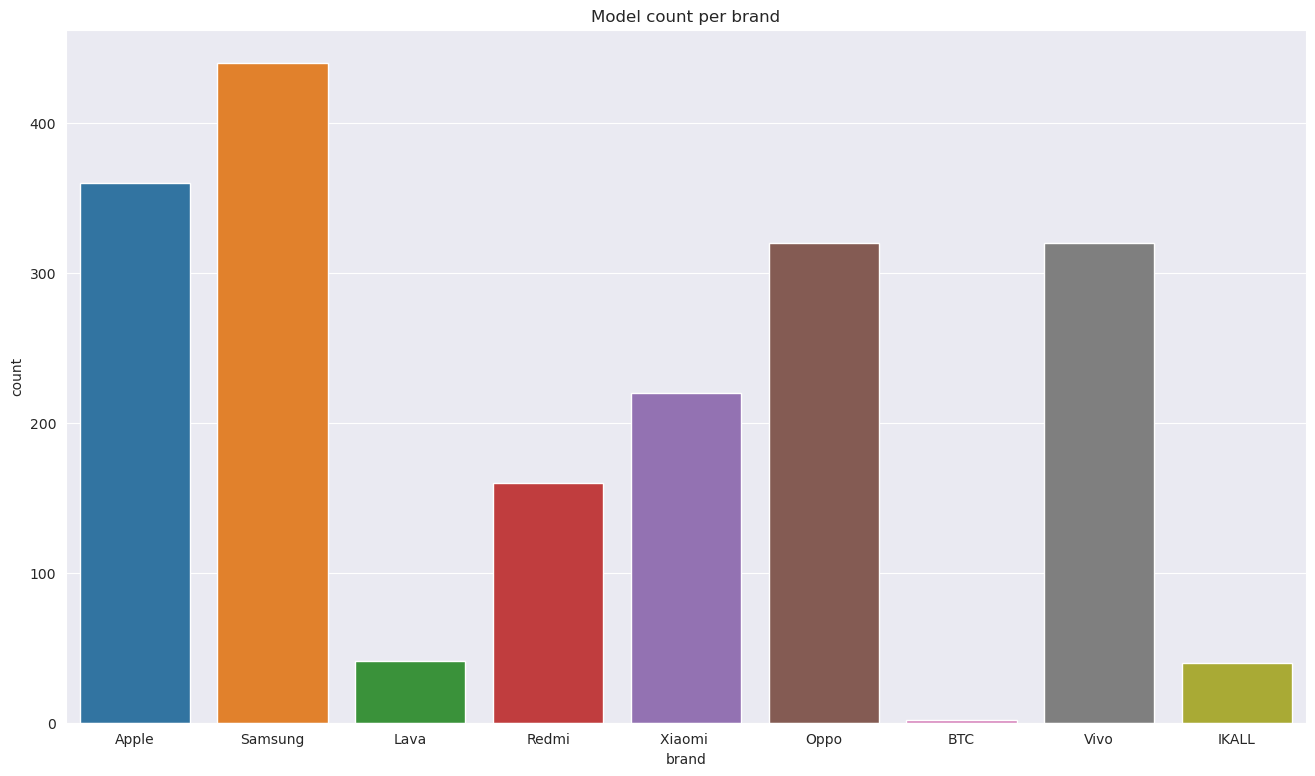

<Figure size 2200x500 with 0 Axes>

In [61]:
plt.figure(figsize=(16, 9))
sns.countplot(data, x='brand')
plt.title("Model count per brand")
plt.savefig(os.path.join(save_path, "brandcount.png"))
plt.show()
plt.clf()

## **Price range spread for all the smartphone models**

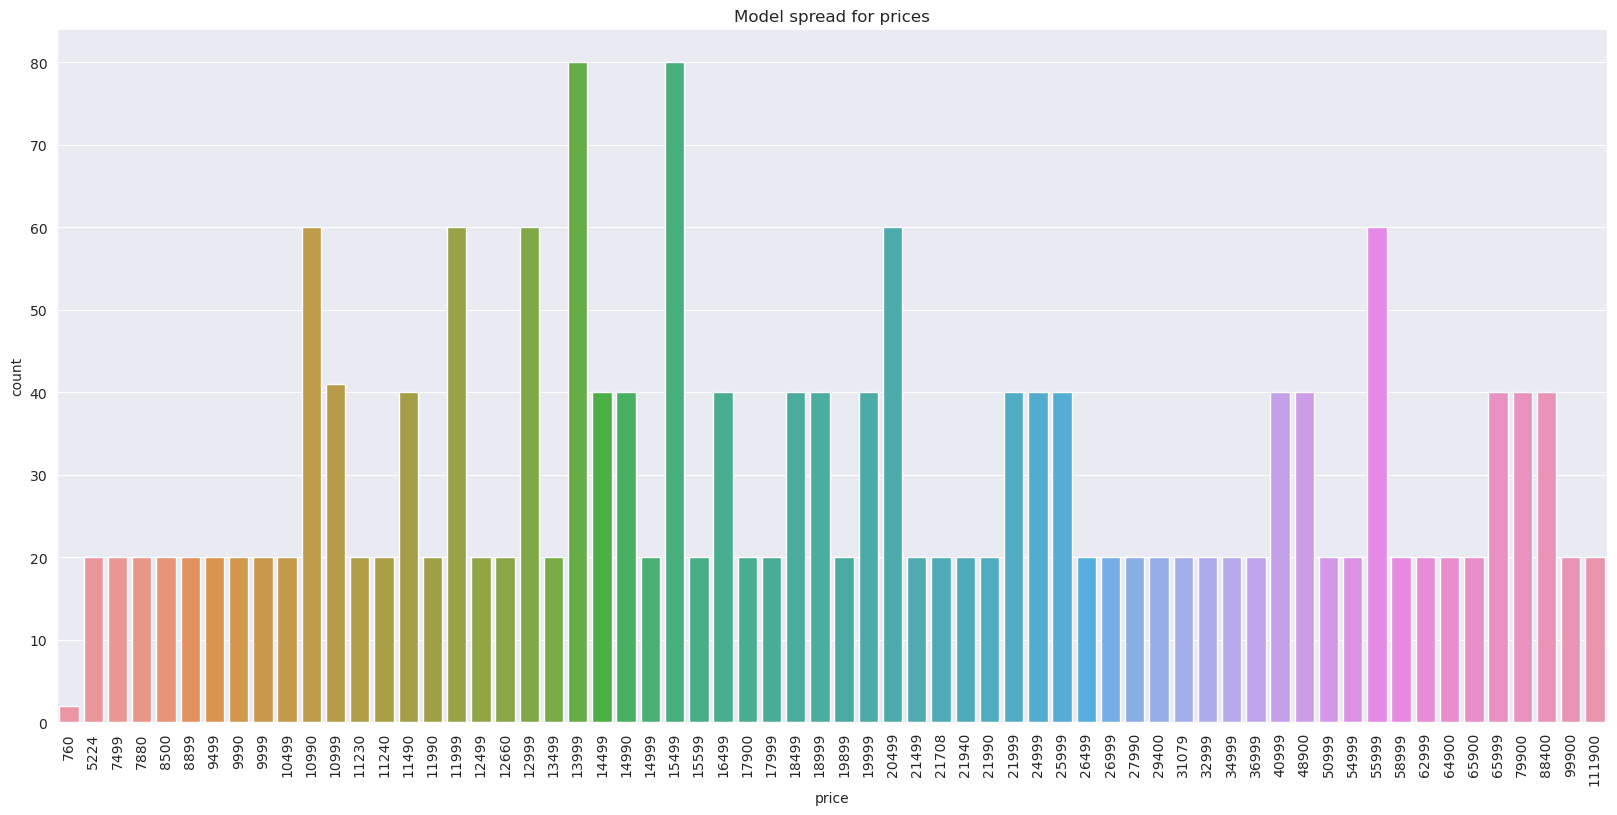

<Figure size 2200x500 with 0 Axes>

In [62]:
plt.figure(figsize=(20, 9))
sns.countplot(data, x='price')
plt.title("Model spread for prices")
plt.xticks(rotation=90)
plt.savefig(os.path.join(save_path, "pricecount.png"))
plt.show()
plt.clf()

## **Rating count spread of the smartphone models**
##### We can see most phone models have rating 4.1

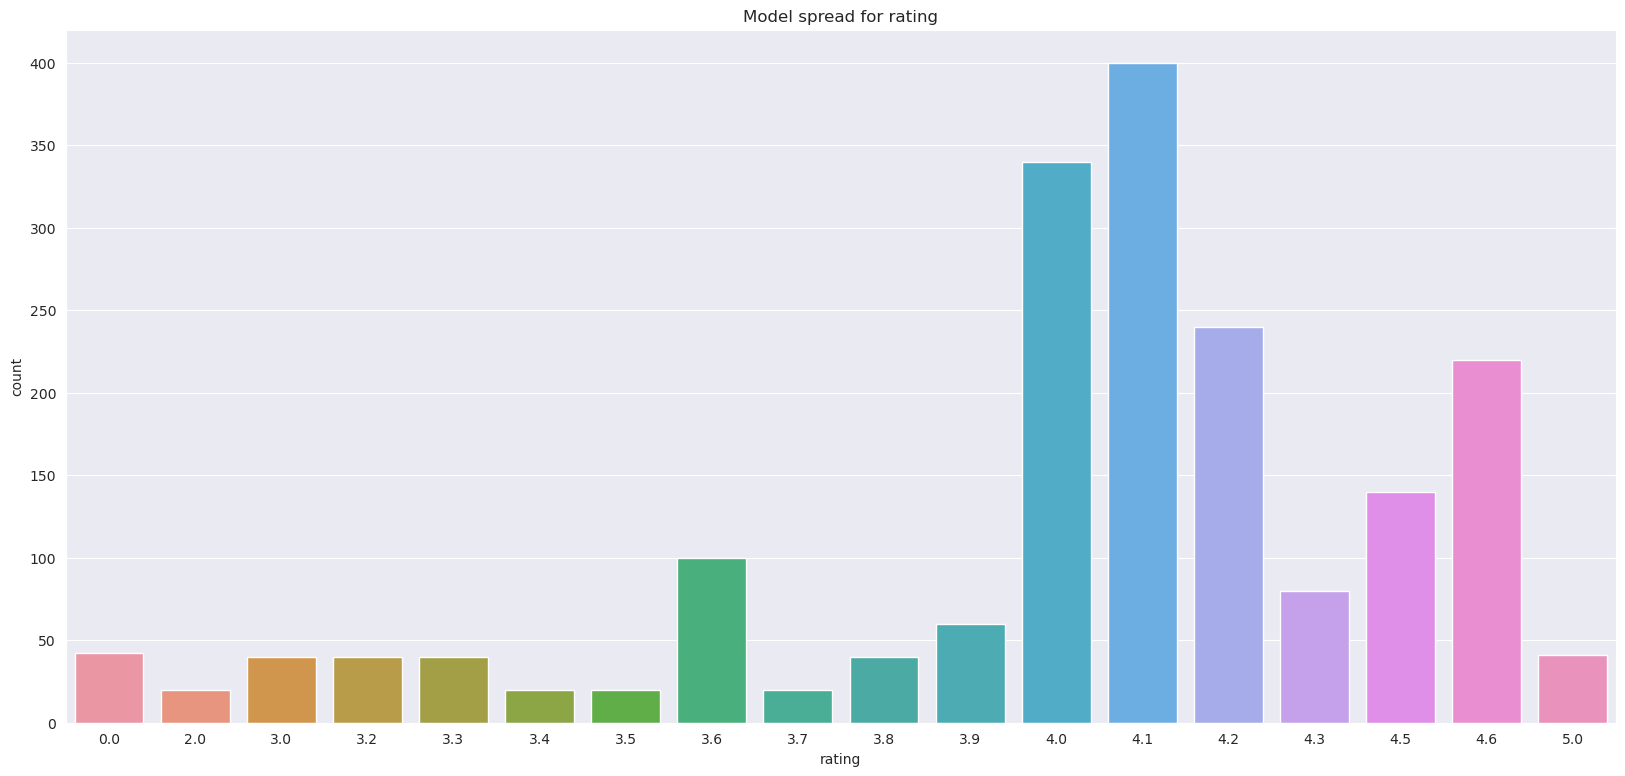

<Figure size 2200x500 with 0 Axes>

In [63]:
plt.figure(figsize=(20, 9))
sns.countplot(data, x='rating')
plt.title("Model spread for rating")
plt.savefig(os.path.join(save_path, "ratingcount.png"))
plt.show()
plt.clf()

## **Review count data spread for various models**

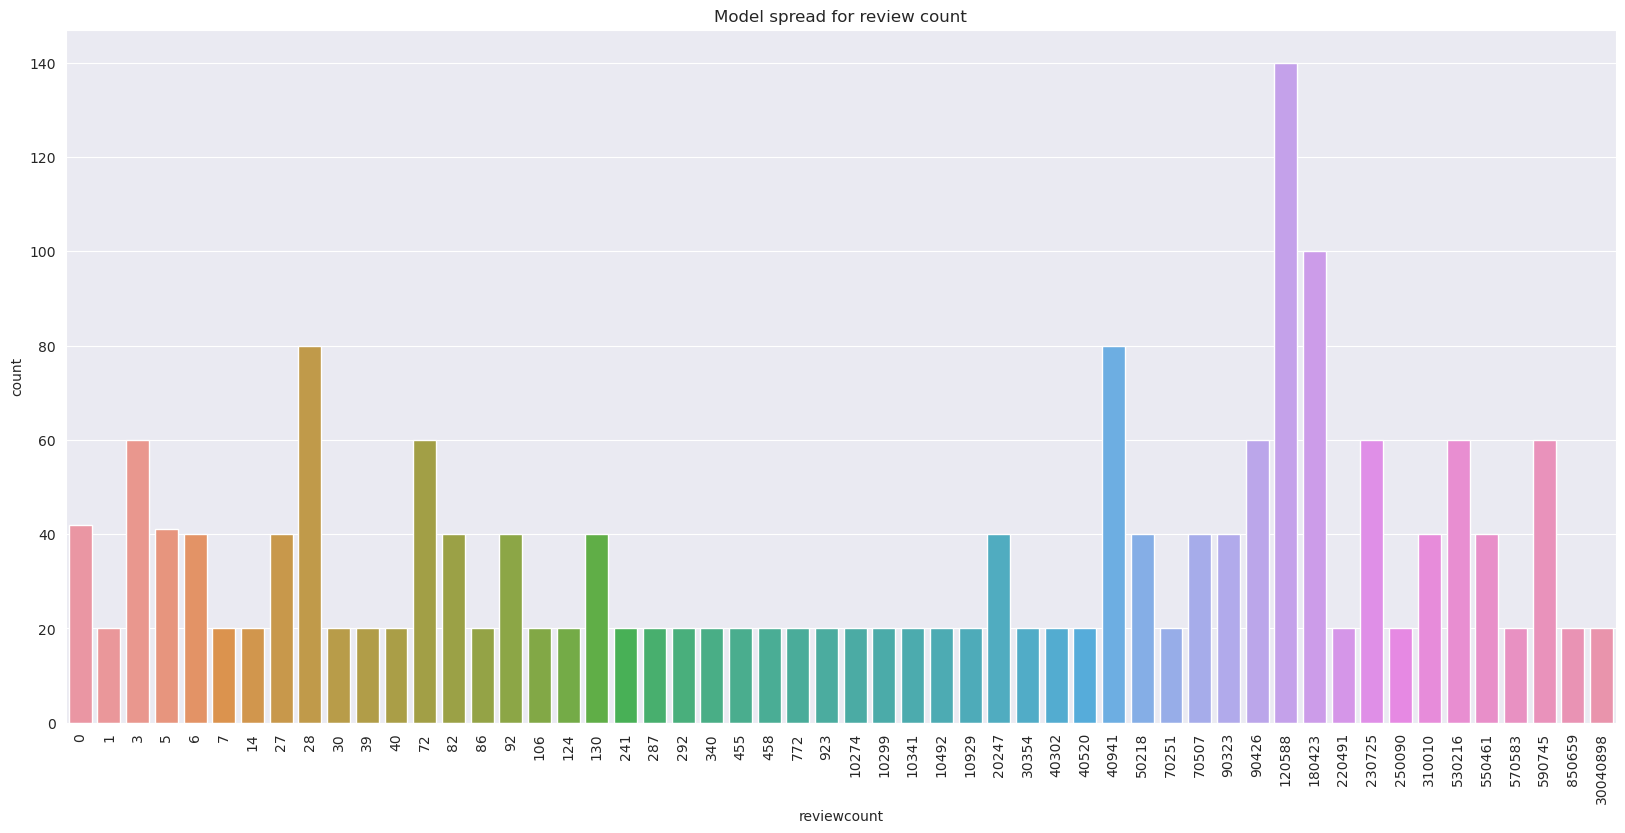

<Figure size 2200x500 with 0 Axes>

In [64]:
plt.figure(figsize=(20, 9))
sns.countplot(data, x='reviewcount')
plt.title("Model spread for review count")
plt.xticks(rotation=90)
plt.savefig(os.path.join(save_path, "reviewcount.png"))
plt.show()
plt.clf()

## **After basic data analysis we can do advance data analysis**

In [65]:
average_data = data.groupby('brand').agg({'price': 'mean', 'rating': 'mean', 'reviewcount': 'sum'}).reset_index()
average_data = average_data.rename(columns={ 'price': 'avg_price', 'rating': 'avg_rating', 'reviewcount': 'total_reviewcount'})
average_data = round(average_data, 2)

In [66]:
average_data

,brand,avg_price,avg_rating,total_reviewcount
0,Apple,67221.78,4.56,30163640
1,BTC,760.00,0.00,0
2,IKALL,6361.50,3.15,180
3,Lava,10999.00,5.00,205
4,Oppo,17143.94,3.75,33080080
5,Redmi,14122.88,3.58,657691400
6,Samsung,17973.27,4.03,73174700
7,Vivo,16886.75,3.80,851280
8,Xiaomi,31489.91,3.83,16870160


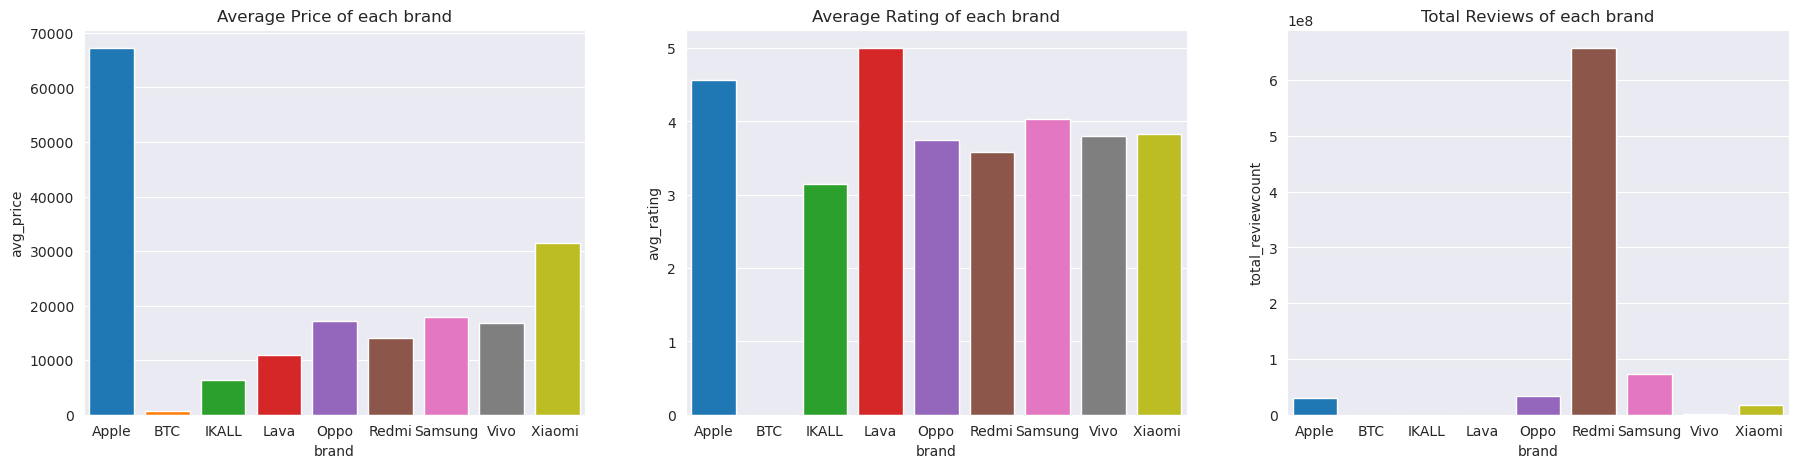

<Figure size 2200x500 with 0 Axes>

In [67]:
fig, ax = plt.subplots(ncols=3)
plt.rcParams['figure.figsize'] = [22, 5]
sns.barplot(average_data, x='brand', y='avg_price', saturation=1, ax=ax[0])
ax[0].title.set_text("Average Price of each brand")
sns.barplot(average_data, x='brand', y='avg_rating', saturation=1, ax=ax[1])
ax[1].title.set_text("Average Rating of each brand")
sns.barplot(average_data, x='brand', y='total_reviewcount', saturation=1, ax=ax[2])
ax[2].title.set_text("Total Reviews of each brand")
plt.savefig(os.path.join(save_path, "averagecount.png"))
plt.show()
plt.clf()

## **Price vs Rating of different brands**

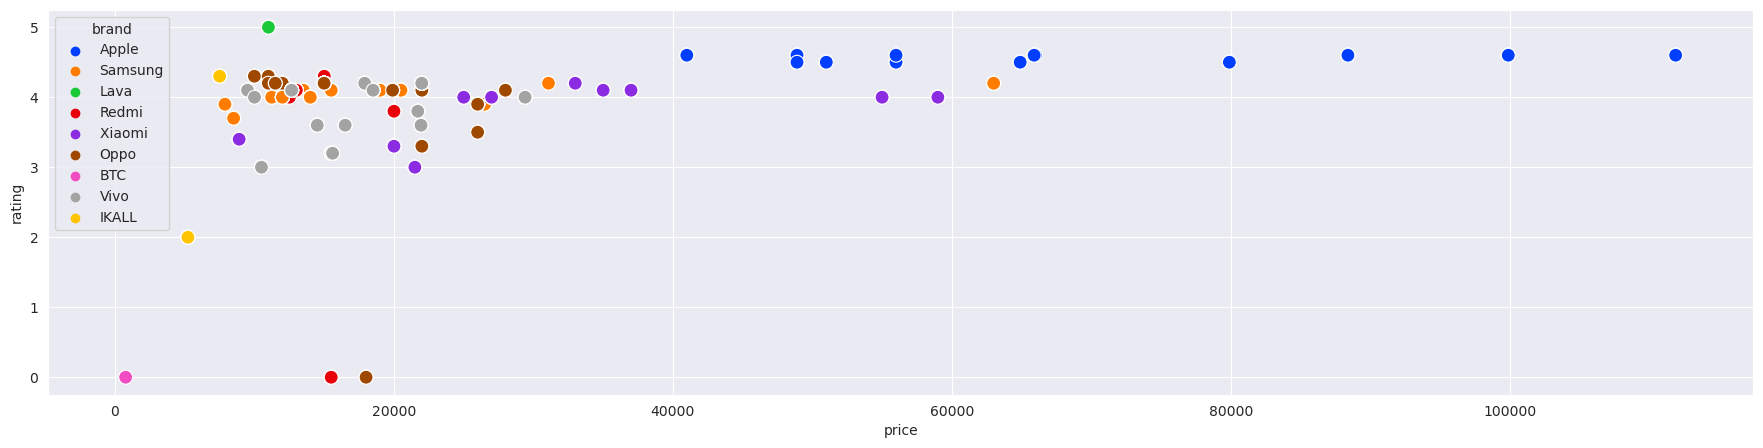

<Figure size 2200x500 with 0 Axes>

In [68]:
sns.scatterplot(data, x='price', y='rating', hue='brand', s=100, palette='bright')
plt.savefig(os.path.join(save_path, "brandplot.png"))
plt.show()
plt.clf()

In [69]:
def brand_model_plot(brand:str):
    model = data[data["brand"] == brand]
    sns.barplot(model, x="description" , y="price")
    plt.xticks(rotation=90)
    brand_fig = brand+".png"
    print(brand_fig)
    plt.savefig(os.path.join(save_path, brand_fig))
    # plt.show()


## **Saving plots for price of unique models of each brand**

Apple.png
BTC.png
IKALL.png
Lava.png
Oppo.png
Redmi.png
Samsung.png
Vivo.png
Xiaomi .png


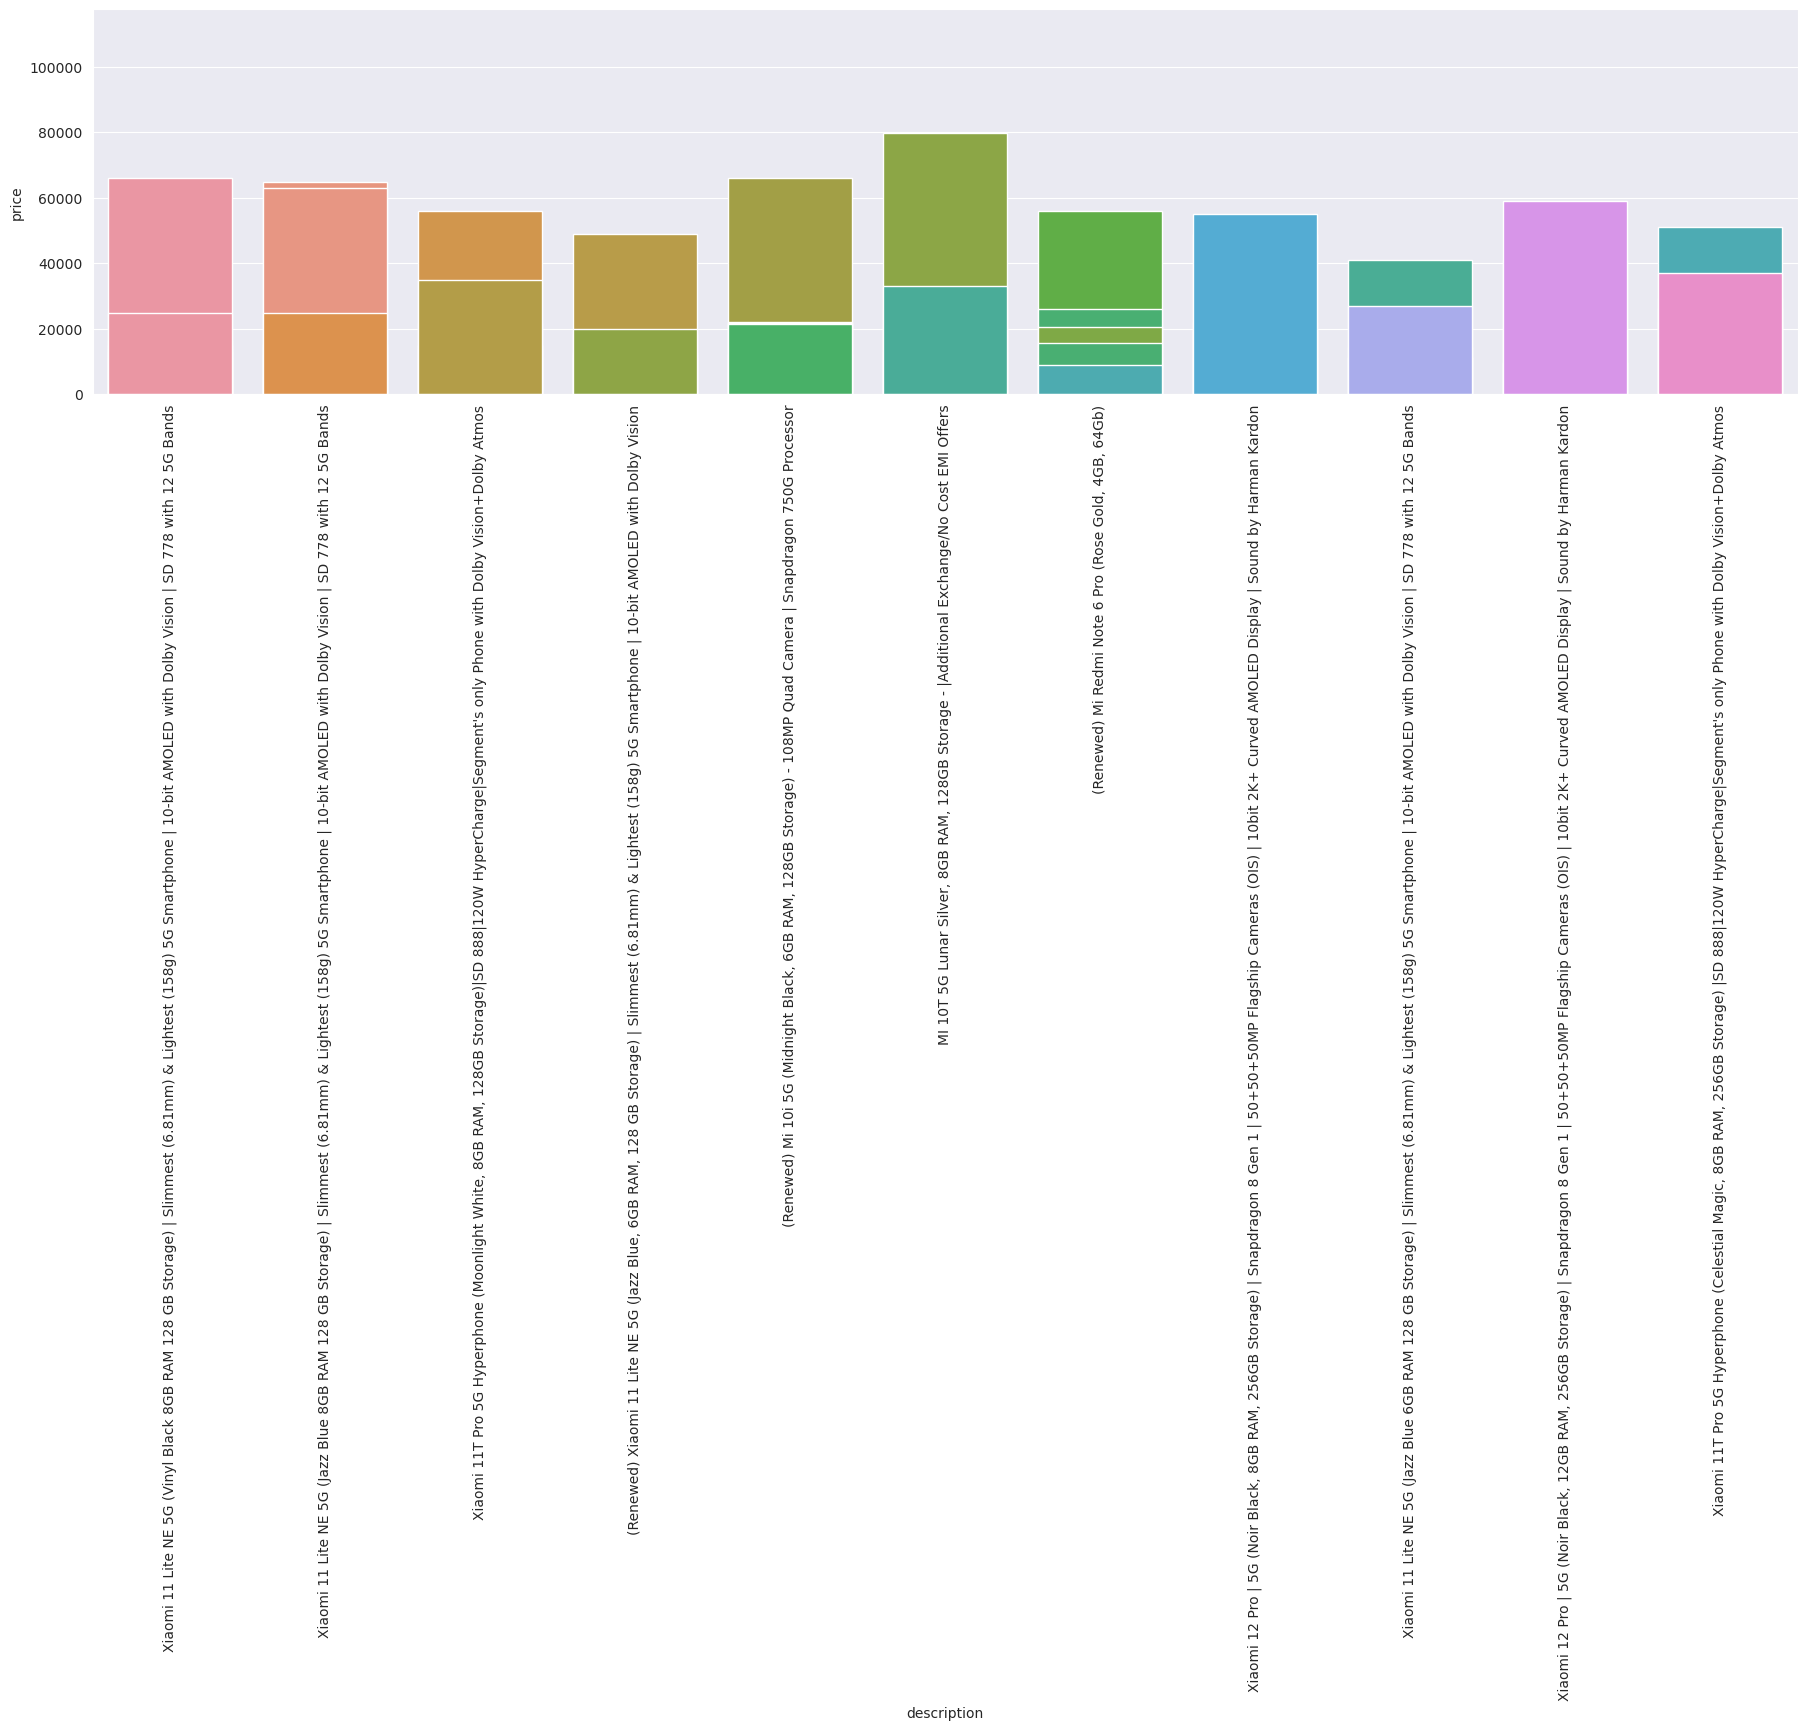

In [70]:
for i in average_data["brand"]:
    brand_model_plot(i)dd